<a href="https://colab.research.google.com/github/khairulsholech/google-collab/blob/main/Validasi_model_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
# Preprocess the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training data into training and validation sets
val_split = 0.2
num_val = int(val_split * len(x_train))
x_val = x_train[:num_val]
y_val = y_train[:num_val]
x_train = x_train[num_val:]
y_train = y_train[num_val:]

In [4]:
# Build the model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [5]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [6]:
# Train the model
batch_size = 128
epochs = 50

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    shuffle=True)

# Save the model with the best validation accuracy
model.save('cifar10_model.h5')

Epoch 1/50
313/313 [==============================] - 244s 775ms/step - loss: 2.0011 - accuracy: 0.2627 - val_loss: 1.7565 - val_accuracy: 0.3820
Epoch 2/50
313/313 [==============================] - 239s 764ms/step - loss: 1.7324 - accuracy: 0.3740 - val_loss: 1.6570 - val_accuracy: 0.4045
Epoch 3/50
313/313 [==============================] - 236s 754ms/step - loss: 1.6165 - accuracy: 0.4119 - val_loss: 1.5297 - val_accuracy: 0.4490
Epoch 4/50
313/313 [==============================] - 240s 769ms/step - loss: 1.5306 - accuracy: 0.4451 - val_loss: 1.5252 - val_accuracy: 0.4495
Epoch 5/50
313/313 [==============================] - 253s 809ms/step - loss: 1.4619 - accuracy: 0.4701 - val_loss: 1.3947 - val_accuracy: 0.5050
Epoch 6/50
313/313 [==============================] - 234s 748ms/step - loss: 1.4109 - accuracy: 0.4909 - val_loss: 1.3350 - val_accuracy: 0.5239
Epoch 7/50
313/313 [==============================] - 242s 774ms/step - loss: 1.3652 - accuracy: 0.5077 - val_loss: 1.3212 -

Test loss: 0.7343242168426514
Test accuracy: 0.7458000183105469


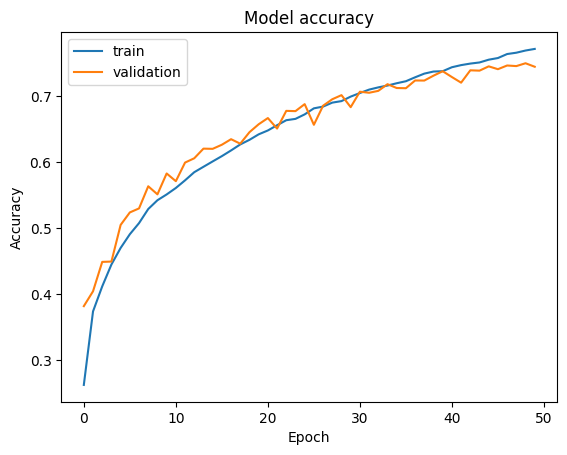

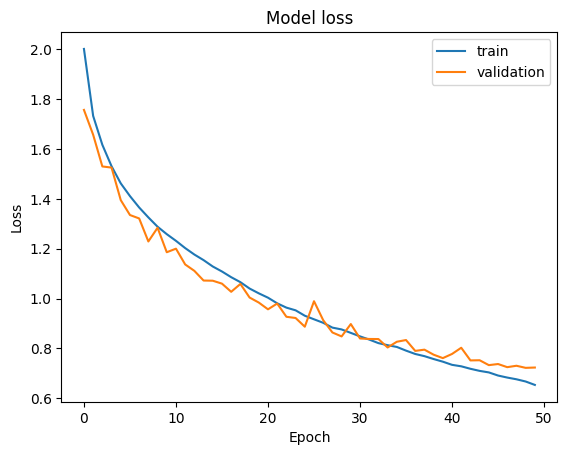

In [7]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()